In [1]:
from obspy import UTCDateTime
import obspy
from obspy.clients.fdsn import Client
from obspy.clients.earthworm import Client as EWClient
from obspy.core.trace import Trace
from obspy.core.stream import Stream
from obspy.signal.trigger import coincidence_trigger
import numpy as np
from scipy import stats
from scipy.fftpack import fft
import glob, os, itertools

import warnings

import matplotlib.pyplot as plt
from obspy import read

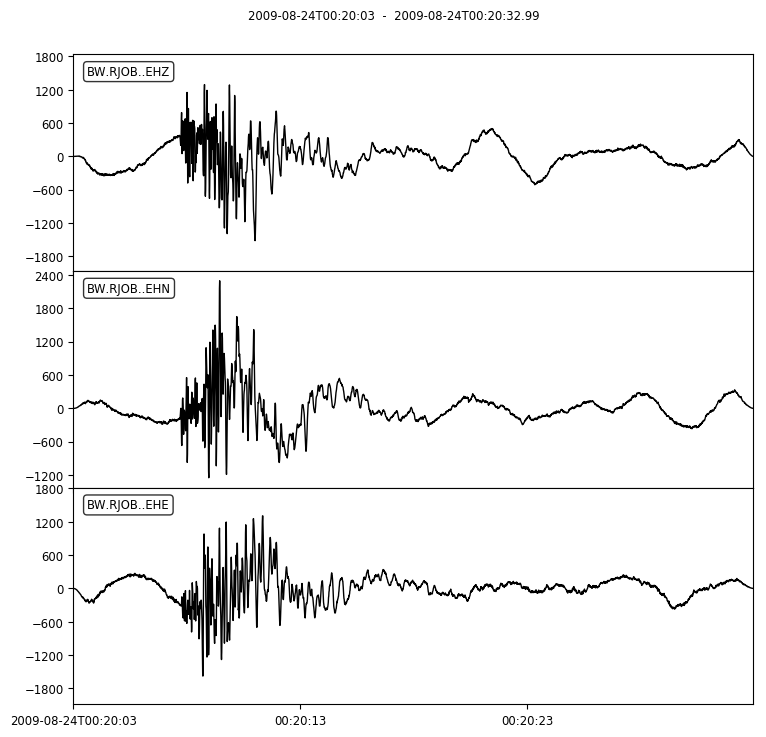

In [2]:
st = read()
st.plot()

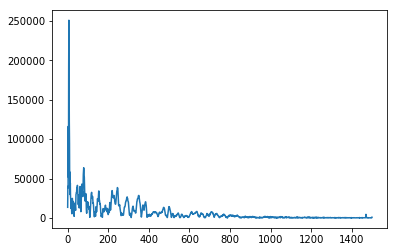

In [3]:
dfft = fft(st[0].data)
dfft2 = np.abs(dfft[0:int(len(dfft)/2)])
plt.plot(dfft2)
plt.show()

In [21]:
from numpy import sin, linspace, pi
from pylab import plot, show, title, xlabel, ylabel, subplot
from scipy import fft, arange

def spectrum(y,Fs, normalize=True, plot='mpl'):
    """
    Plots a Single-Sided Amplitude Spectrum of y(t)
    """
    n = len(y) # length of the signal
    k = arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    print(type(n))
    print(type(frq))
    frq = frq[range(int(n/2))] # one side frequency range

    norm_factor = 1/n if normalize==True else 1
    Y = fft(y)*norm_factor # fft computing and normalization
    Y = Y[range(int(n/2))]
 
    if plot=='mpl':
        spectrum_mpl(frq, Y)
    elif plot=='bokeh':
        spectrum_bokeh(frq, Y)
        
def spectrum_mpl(f, y):
    plt.plot(f,abs(y),'k') # plotting the spectrum
    #plt.xlabel('Freq (Hz)')
    #plt.ylabel('Power')
    plt.show()
    
def spectrum_bokeh(f, y):
    print('Bokeh plot not yet implemented for Spectrum')

In [22]:
spectrum(st[0].data, 100, normalize=False, plot='bokeh')

<class 'int'>
<class 'numpy.ndarray'>
Bokeh plot not yet implemented for Spectrum


## Spectrogram

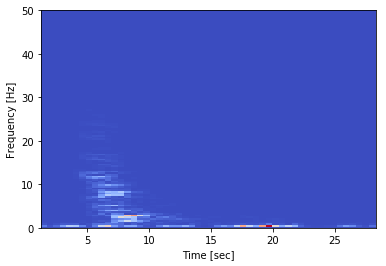

In [34]:
from scipy import signal
f, t, Sxx = signal.spectrogram(st[0].data, 100, noverlap=204)
plt.pcolormesh(t, f, Sxx, cmap='coolwarm')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## bokeh plot

In [ ]:
#st = stream object

In [ ]:
TITLE = "Trace plot"
tools = "pan,wheel_zoom,reset,save".split(',')
hover = HoverTool(tooltips=[
        ("Date","@DateStr"),
])
tools.append(BoxZoomTool(dimensions='width'))
tools.append(hover)

   ### waveform figure ###
p1 = figure(tools=tools, toolbar_location='right', logo='grey', plot_height=400, plot_width=1000, title=TITLE,
    x_axis_type='datetime'
    )
p1.background_fill_color = "#dddddd"
p1.xaxis.axis_label = "Date Time"
p1.yaxis.axis_label = "Counts"
p1.grid.grid_line_color = "white"

   ### specgram figure
p2 = figure(tools=tools, toolbar_location='right', logo='grey', plot_height=400, plot_width=1000, title=TITLE,
    x_axis_type='datetime'
    )
p2.background_fill_color = "#dddddd"
p2.xaxis.axis_label = "Date"
p2.yaxis.axis_label = "Counts"
p2.grid.grid_line_color = "white"

g_cmap = 'virdis'

for i in range(len(st)):
    
    # tvec = ...
    # data = i.data
    # station_name = ...
        
    p1.line(x=tvec_utc, y=data,
        line_color='k', 3.25, legend=station_name)
    p1.yaxis[0].formatter = NumeralTickFormatter(format="0a")
    p1.xaxis[0].formatter = DatetimeTickFormatter(months="%B")
    p1.legend.location = 'top_right'
    
    p2.line(x=fq, y=Y,
        line_color='k', 3.25, legend=station_name)
    p2.yaxis[0].formatter = NumeralTickFormatter(format="0a")
    p2.xaxis[0].formatter = DatetimeTickFormatter(months="%B")
    p2.legend.location = 'top_right'

        ### resource for tick formatter
    # https://bokeh.pydata.org/en/latest/docs/reference/models/formatters.html#bokeh.models.formatters.NumeralTickFormatter
    
    tab1 = Panel(child=p1, title="Waveform [w]")
    tab2 = Panel(child=p2, title="Spectra [s]")
    # tab3 = Panel(child=p3, title="Specgram [g]")

    #tabs = Tabs(tabs=[ tab1, tab2, tabs3 ])
    tabs = Tabs(tabs=[ tab1, tab2 ])
    
figures.append(tabs)

filename=os.getcwd() + '/trace_plot.html'
output_file(filename, title="Trace Plot")
show(column(figures))